**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 8: K-Means Clustering


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler,RobustScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')


In [2]:
def find_centroids(k,n):
    random.seed(5)
    idx=[]
    for i in range(k):
        idx.append(random.randint(0,n-1))
    return idx

In [3]:
def find_clusters(df,c,k,n):
    dist=[[] for _ in range(k)]
    for i in range(n):
        temp=[]
        for j in range(k):
            dist_temp= np.sum((df[i]-c[j])**2)
            temp.append(dist_temp)
        location=temp.index(min(temp))
        dist[location].append(i)
    return dist

In [4]:
def find_new_centroids(df,dist,c,k,m):
    for i in range(k):
        temp_mean=[0 for _ in range(m)]
        for j in range(len(dist[i])):
            id=dist[i][j]
            temp=0
            for kk in range(m):
                temp_mean[kk]+=df[id][kk]/len(dist[i])
        for j in range(m):
            c[i][j]=temp_mean[j]
    return c


In [5]:
def plot_2D(dist,df,c,k):
    plt.figure(figsize=[10,6])
    distx=[[] for i in range(k)]
    disty=[[] for i in range(k)]
    for i in range(k):
        for j in range(len(dist[i])):
            id=dist[i][j]
            distx[i].append(df[id][0])
            disty[i].append(df[id][1])
    cx=[];cy=[]
    for i in range(k):
        cx.append(c[i][0])
        cy.append(c[i][1])
        sns.scatterplot(distx[i],disty[i],markers='o',s=200)#,c=next(clr))
    sns.scatterplot(cx,cy,color='.2',marker='*',s=200)
    plt.grid()
    plt.xlabel('X',fontsize=15)
    plt.ylabel('Y',fontsize=15)

In [6]:
def k_means(df,k,plot):
    n=df.shape[0]
    m=df.shape[1]
    #indices of centroid
    idx=find_centroids(k,n)

    #to store the centroids kxm
    c=[[] for _ in range(k)]
    cprev=[[] for _ in range(k)]

    for i in range(k):
        for j in range(m):
            c[i].append(df[idx[i]][j])
            cprev[i].append(df[idx[i]][j])
    
    #to get the points in a given cluster kxdim
    #just store the indices in the original array
    dist=[[] for _ in range(k)]
    itr=0
    flag=False
    while flag==False and itr!=150:
        
        #k clusters with elements in the cluster
        dist=find_clusters(df,c,k,n)
            
        #store previous centroids
        cprev=np.copy(c)

        #finding the new centroids
        c=find_new_centroids(df,dist,c,k,m)
        
        count=0
        for i in range(k):
            for j in range(len(c[0])):
                if c[i][j]==cprev[i][j]:
                    count+=1
        if count==k*len(c[0]):
            break
        itr+=1

    #to plot if plot=True
    if plot==True:
        plot_2D(dist,df,c,k)

    return c,dist


In [7]:
def find_inertia(c,d,df):
    ans=0
    for i in range(len(c)):
        indices=d[i]
        for kk in range(len(indices)):
            for j in range(len(c[0])):
                ans+=(c[i][j]-df[indices[kk]][j])**2
    return ans

# Q1

In [8]:
x = [10,14,8,12,15,12,15,17,5,18,22,25,35,21,39,27,25,33,30,36]
y = [8,25,10,30,35,12,14,15,22,32,2,21,35,7,15,29,33,23,17,11]

In [9]:
df=[]
df.append(x)
df.append(y)
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
SSE_q1=[]
n=20
for i in range(1,n):
    c_q1,dist_q1=k_means(df,i,False)
    SSE_q1.append(find_inertia(c_q1,dist_q1,df))


Text(0.5, 1.0, 'Elbow Curve')

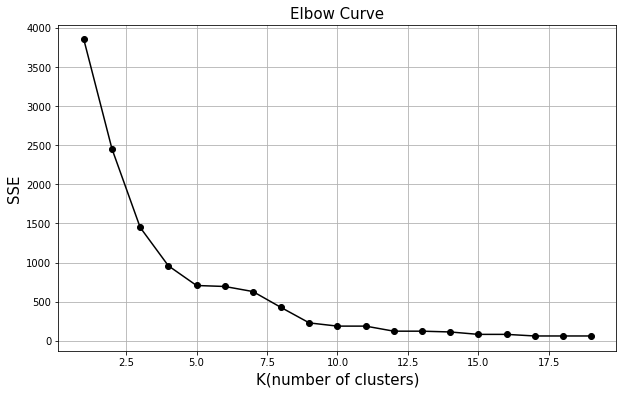

In [11]:
x_axis=np.arange(1,20)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q1,'k-o')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)

Text(0.5, 1.0, 'Optimal cluster size')

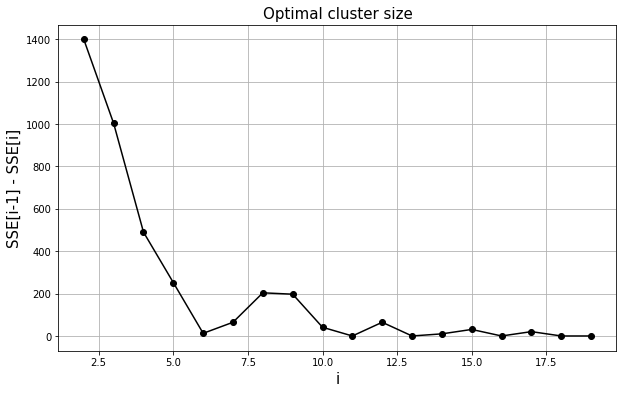

In [12]:
diff_x=np.arange(2,20)
diff_sse_q1 = [SSE_q1[i-1]-SSE_q1[i] for i in range(1,len(SSE_q1))]
plt.figure(figsize=[10,6])
plt.plot(diff_x,diff_sse_q1,'k-o')
plt.grid()
plt.ylabel('SSE[i-1] - SSE[i]',fontsize=15)
plt.xlabel('i',fontsize=15)
plt.title('Optimal cluster size',fontsize=15)

### We can see that at i=6 we get almost zero difference and after that we get such a case for i>10 for which the computation time increases significantly hence, K=6 is a good choice for number of clusters.

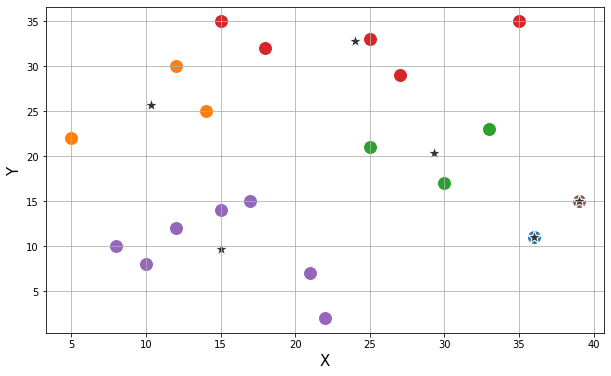

In [13]:
c_q1,dist_q1=k_means(df,6,True)

# Q2

In [14]:
data_digits=load_digits().data
data_digits.shape

(1797, 64)

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_digits)

In [16]:
kmeans = KMeans(n_clusters = 10, init='k-means++')
kmeans.fit(data_scaled)
SSE_kmeans=kmeans.inertia_
print('SSE using inbuilt function:',SSE_kmeans)

SSE using inbuilt function: 69408.34813425265


In [17]:
c_q2,dist_q2=k_means(data_scaled,10,False)
SSE_q2_myfunc = find_inertia(c_q2,dist_q2,data_scaled)
print('SSE using my function(k_means):',SSE_q2_myfunc)

SSE using my function(k_means): 69476.70340699745


### SSE shows that the k_means() function provides a good approximation and is to a large extent similar to the inbuilt function. Although we can calculate the SSE for this big data but using the current function k_means() we can not visualize the effect of clustering as it would have 10 dimensions. We can make an attempt to visualize this using PCA.

### Inbuilt k-means function

In [18]:
SSE_inbuilt = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE_inbuilt.append(kmeans.inertia_)

### My function for digits dataset

In [19]:
SSE_q2=[]
n=11
for i in range(1,n):
    c_q2,dist_q2=k_means(data_scaled,i,False)
    SSE_q2.append(find_inertia(c_q2,dist_q2,data_scaled))


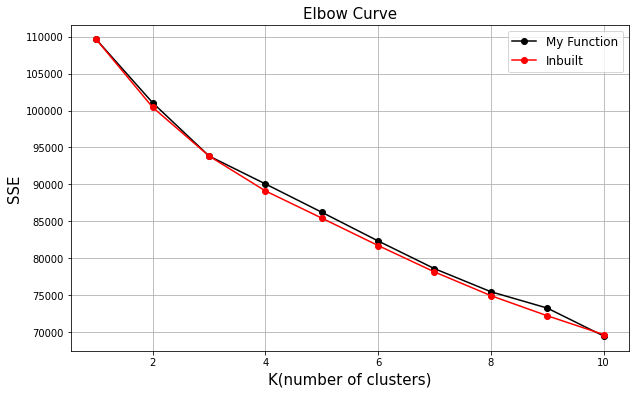

In [20]:
x_axis=[i for i in range(1,11)]
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q2,'k-o',label='My Function')
plt.plot(x_axis,SSE_inbuilt,'r-o',label='Inbuilt')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)
plt.legend(fontsize=12)